In [131]:
from pathlib import Path
from astromodule.io import read_table, write_table
from astromodule.table import concat_tables, selfmatch, crossmatch
import matplotlib.pyplot as plt

In [206]:
cluster1 = 'A3128'
cluster2 = 'A3158'
df_photo1 = read_table(f'outputs_v5/photo/cluster_{cluster1}.csv')
df_photo2 = read_table(f'outputs_v5/photo/cluster_{cluster2}.csv')
df_spec1 = read_table(f'outputs_v5/spec/{cluster1}_spec+G.parquet')
df_spec2 = read_table(f'outputs_v5/spec/{cluster2}_spec+G.parquet')
df_photo = concat_tables([df_photo1, df_photo2])
df_spec = concat_tables([df_spec1, df_spec2])

Text(0, 0.5, 'count')

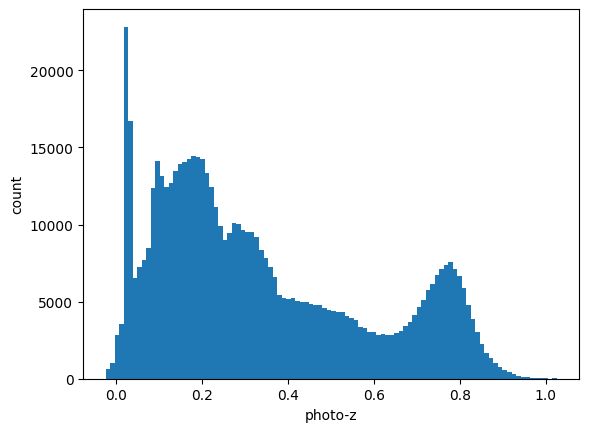

In [207]:
plt.hist(df_photo.zml, bins=100)
plt.xlabel('photo-z')
plt.ylabel('count')

In [208]:
df_photo_unique = selfmatch(df_photo, radius=1, action='keep1')

Text(0, 0.5, 'count')

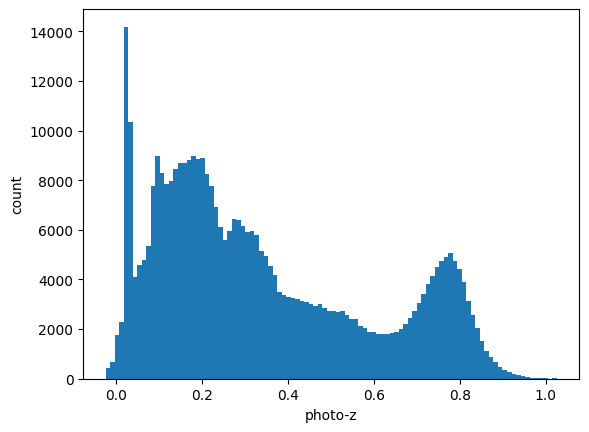

In [209]:
plt.hist(df_photo_unique.zml, bins=100)
plt.xlabel('photo-z')
plt.ylabel('count')

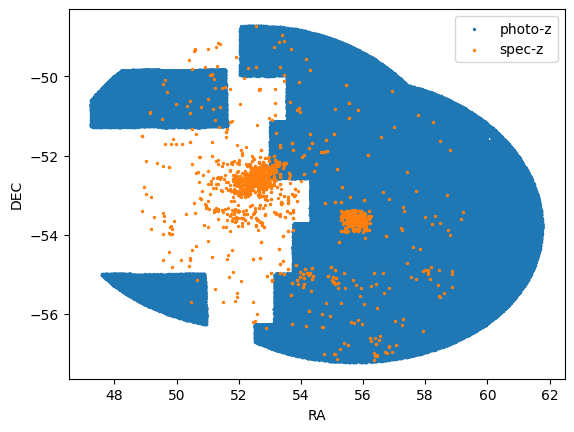

In [210]:
plt.scatter(df_photo.RA, df_photo.DEC, s=2, label='photo-z')
plt.scatter(df_spec.RA, df_spec.DEC, s=2, label='spec-z')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend()

In [211]:
df_paulo1 = read_table(f'outputs_v5/paulo/G/clusters/cluster_0022.dat')
df_paulo2 = read_table(f'outputs_v5/paulo/G/clusters/cluster_0039.dat')
df_paulo = concat_tables((df_paulo1, df_paulo2))

/home/natan/.local/share/virtualenvs/clusters-VFbwmWfJ/lib/python3.10/site-packages/astromodule/io.py:199: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(
/home/natan/.local/share/virtualenvs/clusters-VFbwmWfJ/lib/python3.10/site-packages/astromodule/io.py:199: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(


In [212]:
cols = ['ra', 'dec', 'z_spec', 'z_spec_err', 'velocity', 'velocity_err', 'radius_deg', 'radius_Mpc', 'velocity_offset', 'flag_m']
df_members1 = read_table('hold_data_to_andre/hold_cls_files/cluster.gals.sel.shiftgap.iter.00039', fmt='dat', col_names=cols)
df_members2 = read_table('hold_data_to_andre/hold_cls_files/cluster.gals.sel.shiftgap.iter.00022', fmt='dat', col_names=cols)
df_members1 = df_members1.rename(columns={'flag_m': 'A3128_member'})
df_members2 = df_members2.rename(columns={'flag_m': 'A3158_member'})
df_members = concat_tables([df_members1, df_members2])[['ra', 'dec', 'z_spec', 'z_spec_err', 'A3128_member', 'A3158_member']]

/home/natan/.local/share/virtualenvs/clusters-VFbwmWfJ/lib/python3.10/site-packages/astromodule/io.py:199: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(
/home/natan/.local/share/virtualenvs/clusters-VFbwmWfJ/lib/python3.10/site-packages/astromodule/io.py:199: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(


In [218]:
df_final = crossmatch(
  table1=df_photo,
  table2=df_members,
  join='all1',
  radius=1,
)
df_final
df_final_unique = crossmatch(
  table1=df_photo_unique,
  table2=df_members,
  join='all1',
  radius=1,
)

del df_final['ra_2']
del df_final['dec_2']
del df_final['xmatch_sep']
df_final = df_final.rename(columns={
  'RA_1': 'ra', 
  'DEC_1': 'dec',
  'Field': 'field', 
  'zml': 'z_phot', 
  'odds': 'z_phot_odss', 
})

del df_final_unique['ra_2']
del df_final_unique['dec_2']
del df_final_unique['xmatch_sep']
df_final_unique = df_final_unique.rename(columns={
  'RA_1': 'ra', 
  'DEC_1': 'dec',
  'Field': 'field', 
  'zml': 'z_phot', 
  'odds': 'z_phot_odss', 
})

df_missing_spec = crossmatch(
  table1=df_final,
  table2=df_members,
  join='2not1',
  radius=1,
)


df_final = concat_tables([df_final, df_missing_spec])
# df_final = df_final.fillna(-999)

df_final_unique = concat_tables([df_final_unique, df_missing_spec])
# df_final_unique = df_final_unique.fillna(-999)

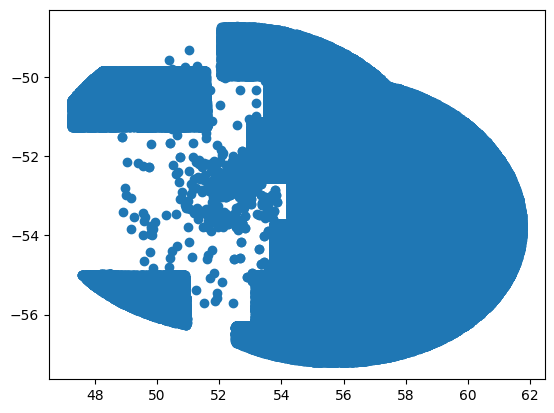

In [214]:
plt.scatter(df_final.ra, df_final.dec)
# plt.scatter(df_final_unique[df_final_unique.z_spec > 0].ra, df_final_unique[df_final_unique.z_spec > 0].dec)

In [219]:
write_table(df_final, 'laerte/A3128+A3158.csv')
write_table(df_final, 'laerte/A3128+A3158.dat')
write_table(df_final, 'laerte/A3128+A3158.fits')

write_table(df_final_unique, 'laerte/A3128+A3158_unique.csv')
write_table(df_final_unique, 'laerte/A3128+A3158_unique.dat')
write_table(df_final_unique, 'laerte/A3128+A3158_unique.fits')

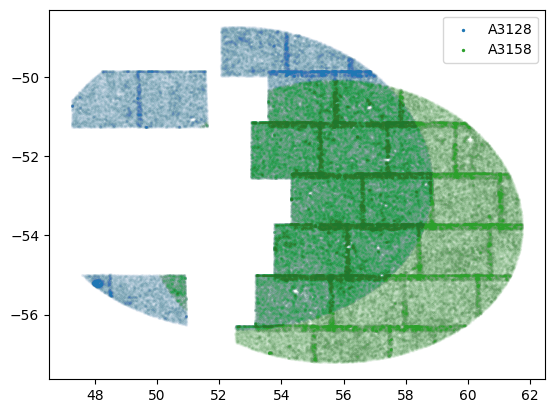

In [ ]:
plt.scatter(df_photo1.RA, df_photo1.DEC, color='tab:blue', alpha=.012, s=2, label=cluster1)
plt.scatter(df_photo2.RA, df_photo2.DEC, color='tab:green', alpha=.012, s=2, label=cluster2)
leg = plt.legend()
leg.legend_handles[0].set_alpha(1)
leg.legend_handles[1].set_alpha(1)

In [217]:
read_table('laerte/A3128+A3158.fits')

,ra,dec,field,g_auto,r_auto,i_auto,u_auto,z_auto,r_aper_6,z_phot,z_phot_odss,cluster,z_spec,z_spec_err,A3128_member,A3158_member
0,48.227129,-51.270722,SPLUS-s39s24,14.522326,14.202196,14.132389,15.651795,14.145235,14.304039,0.344917,0.170435,A3128,NaN,NaN,NaN,NaN
1,47.496780,-51.261764,SPLUS-s39s24,15.324274,14.638744,14.413147,17.256783,14.324377,14.727503,0.096500,0.484822,A3128,NaN,NaN,NaN,NaN
2,49.467166,-51.256008,SPLUS-s39s24,14.826271,14.624695,14.852919,17.426588,13.879854,15.375557,0.111917,0.318788,A3128,NaN,NaN,NaN,NaN
3,47.374848,-51.138972,SPLUS-s39s24,15.271152,14.574642,14.126457,16.423275,14.507923,16.659037,0.032333,0.774453,A3128,NaN,NaN,NaN,NaN
4,47.308791,-51.243699,SPLUS-s39s24,14.490553,14.025547,13.898615,15.885303,13.877709,14.095156,0.350167,0.170990,A3128,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612015,55.551792,-50.676028,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.059808,0.000103,NaN,1.0
612016,56.380120,-56.601591,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.061000,0.000333,NaN,1.0
612017,53.926667,-50.787361,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.061272,0.000150,NaN,1.0
612018,56.421607,-56.750680,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.045918,0.000400,NaN,1.0
